In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
names = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 
         'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']
df1 = pd.read_table('echocardiogram.data', sep=',', names=names)
df1.head(20)

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11.0,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19.0,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16.0,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57.0,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19.0,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
5,26.0,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
6,13.0,0,62,0,0.230,31,5.430,22.5,1.875,0.857,name,1,0
7,50.0,0,60,0,0.330,8,5.250,14,1,1,name,1,0
8,19.0,0,46,0,0.340,0,5.090,16,1.140,1.003,name,1,0
9,25.0,0,54,0,0.140,13,4.490,15.5,1.190,0.930,name,1,0


#### Now we drop the meaningless columns

In [3]:
df1 = df1.drop(['name', 'group', 'alive-at-1'], axis=1)
df1.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult
0,11.0,0,71,0,0.260,9,4.600,14,1,1
1,19.0,0,72,0,0.380,6,4.100,14,1.700,0.588
2,16.0,0,55,0,0.260,4,3.420,14,1,1
3,57.0,0,60,0,0.253,12.062,4.603,16,1.450,0.788
4,19.0,1,57,0,0.160,22,5.750,18,2.250,0.571


In [4]:
df1.isnull().sum()

survival                 0
still-alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-score        0
wall-motion-index        0
mult                     0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               110 non-null    float64
 1   still-alive            110 non-null    int64  
 2   age-at-heart-attack    110 non-null    object 
 3   pericardial-effusion   110 non-null    int64  
 4   fractional-shortening  110 non-null    object 
 5   epss                   110 non-null    object 
 6   lvdd                   110 non-null    object 
 7   wall-motion-score      110 non-null    object 
 8   wall-motion-index      110 non-null    object 
 9   mult                   110 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.7+ KB


#### Let's convert the object variables into numeric using errors = coerce to transform the unknown "?" into NaN

In [6]:
df1[['age-at-heart-attack', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score',
   'wall-motion-index', 'mult']] = df1[['age-at-heart-attack', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score',
   'wall-motion-index', 'mult']].apply(pd.to_numeric, errors = 'coerce')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               110 non-null    float64
 1   still-alive            110 non-null    int64  
 2   age-at-heart-attack    108 non-null    float64
 3   pericardial-effusion   110 non-null    int64  
 4   fractional-shortening  103 non-null    float64
 5   epss                   96 non-null     float64
 6   lvdd                   100 non-null    float64
 7   wall-motion-score      107 non-null    float64
 8   wall-motion-index      109 non-null    float64
 9   mult                   107 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 8.7 KB


#### In this module we will exclude the censored data related to the patients that have survived less than one year but are still alive 

In [8]:
df1_DirtyAlive = df1[(df1['survival']<12) & (df1['still-alive']==1)]
df1_DirtyAlive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 10 to 107
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               33 non-null     float64
 1   still-alive            33 non-null     int64  
 2   age-at-heart-attack    31 non-null     float64
 3   pericardial-effusion   33 non-null     int64  
 4   fractional-shortening  29 non-null     float64
 5   epss                   28 non-null     float64
 6   lvdd                   27 non-null     float64
 7   wall-motion-score      31 non-null     float64
 8   wall-motion-index      32 non-null     float64
 9   mult                   31 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 2.8 KB


In [9]:
df1_DirtyAlive.index

Int64Index([ 10,  14,  16,  17,  19,  20,  21,  22,  23,  28,  30,  31,  32,
             37,  44,  48,  49,  50,  53,  62,  65,  69,  75,  76,  82,  83,
             85,  89,  96,  97, 102, 106, 107],
           dtype='int64')

In [10]:
df1 = df1.drop(labels=df1_DirtyAlive.index, axis=0)


df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 109
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               77 non-null     float64
 1   still-alive            77 non-null     int64  
 2   age-at-heart-attack    77 non-null     float64
 3   pericardial-effusion   77 non-null     int64  
 4   fractional-shortening  74 non-null     float64
 5   epss                   68 non-null     float64
 6   lvdd                   73 non-null     float64
 7   wall-motion-score      76 non-null     float64
 8   wall-motion-index      77 non-null     float64
 9   mult                   76 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.6 KB


#### Let's split the feature columns into discrete and continuous 

In [11]:
discrete = ['pericardial-effusion']
continuous = df1.drop(['pericardial-effusion', 'still-alive'], axis=1).columns

In [12]:
print(continuous)

Index(['survival', 'age-at-heart-attack', 'fractional-shortening', 'epss',
       'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult'],
      dtype='object')


#### In this work we will first identify the features with outliers to fill their null values with median(), and fill the null values of the others with median(). 

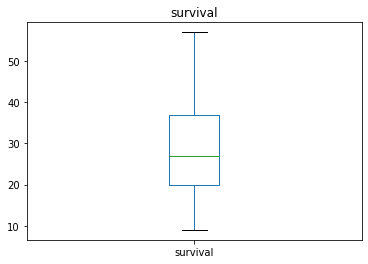

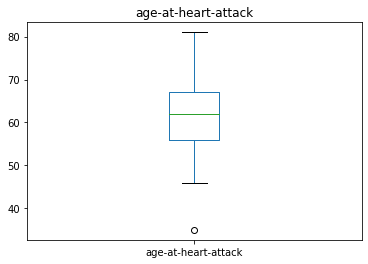

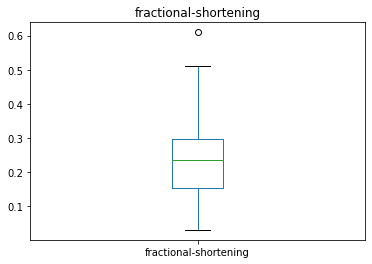

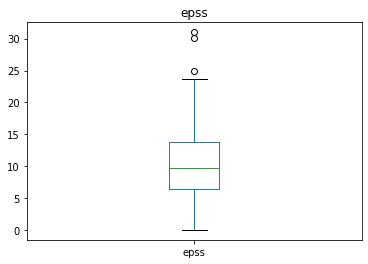

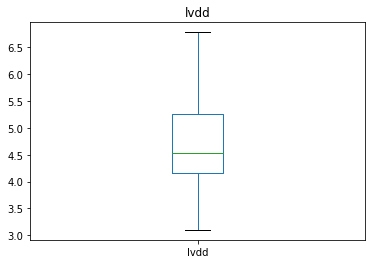

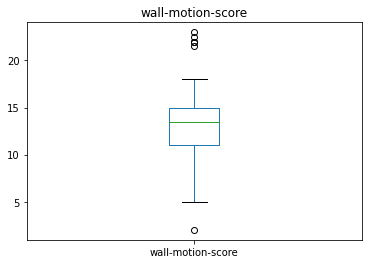

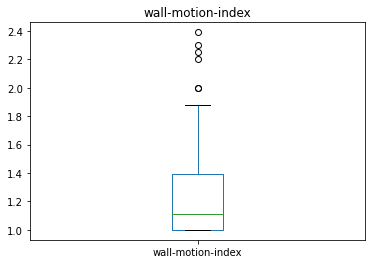

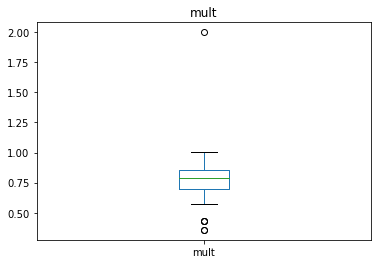

In [13]:
for feature in continuous:
    df1.boxplot(column=feature, grid = False)
    plt.title(feature)
    plt.show()

In [14]:
features_with_outliers = ['wall-motion-score', 'wall-motion-index', 'mult']

In [15]:
for feature in continuous:
    if feature in features_with_outliers:
         df1[feature].fillna(df1[feature].median(), inplace=True)
    else:
         df1[feature].fillna(df1[feature].mean(), inplace=True)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 109
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               77 non-null     float64
 1   still-alive            77 non-null     int64  
 2   age-at-heart-attack    77 non-null     float64
 3   pericardial-effusion   77 non-null     int64  
 4   fractional-shortening  77 non-null     float64
 5   epss                   77 non-null     float64
 6   lvdd                   77 non-null     float64
 7   wall-motion-score      77 non-null     float64
 8   wall-motion-index      77 non-null     float64
 9   mult                   77 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.6 KB


#### Create a new column to use as label

In [18]:
df1.loc[(df1['survival']>=24) & (df1['still-alive']==1), 'Survived at least 2 years'] = 1
df1.loc[(df1['survival']>=24) & (df1['still-alive']==0), 'Survived at least 2 years'] = 0
df1.loc[(df1['survival']<24), 'Survived at least 2 years'] = 0

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 109
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survival                   77 non-null     float64
 1   still-alive                77 non-null     int64  
 2   age-at-heart-attack        77 non-null     float64
 3   pericardial-effusion       77 non-null     int64  
 4   fractional-shortening      77 non-null     float64
 5   epss                       77 non-null     float64
 6   lvdd                       77 non-null     float64
 7   wall-motion-score          77 non-null     float64
 8   wall-motion-index          77 non-null     float64
 9   mult                       77 non-null     float64
 10  Survived at least 2 years  77 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 9.7 KB


In [20]:
df1['Survived at least 2 years'].value_counts()

0.0    76
1.0     1
Name: Survived at least 2 years, dtype: int64

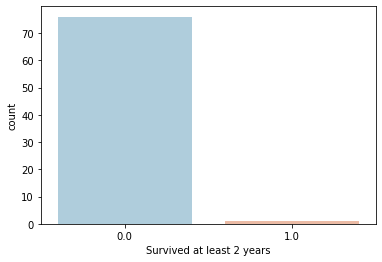

In [21]:
sns.countplot(x='Survived at least 2 years',data=df1,palette='RdBu_r')

#### For such extremely imbalanced situation, let's buid a model that predicts survivals of at least 1 year

In [25]:
df1.head(10)

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,Survived at least 2 years
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000,0.0
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571,0.0
5,26.0,0,68.0,0,0.260,5.000,4.310,12.0,1.000,0.857,0.0
6,13.0,0,62.0,0,0.230,31.000,5.430,22.5,1.875,0.857,0.0
7,50.0,0,60.0,0,0.330,8.000,5.250,14.0,1.000,1.000,0.0
8,19.0,0,46.0,0,0.340,0.000,5.090,16.0,1.140,1.003,0.0
9,25.0,0,54.0,0,0.140,13.000,4.490,15.5,1.190,0.930,0.0


In [26]:
df1.drop(columns = ['Survived at least 2 years'], inplace = True)
df1.head(10)

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571
5,26.0,0,68.0,0,0.260,5.000,4.310,12.0,1.000,0.857
6,13.0,0,62.0,0,0.230,31.000,5.430,22.5,1.875,0.857
7,50.0,0,60.0,0,0.330,8.000,5.250,14.0,1.000,1.000
8,19.0,0,46.0,0,0.340,0.000,5.090,16.0,1.140,1.003
9,25.0,0,54.0,0,0.140,13.000,4.490,15.5,1.190,0.930


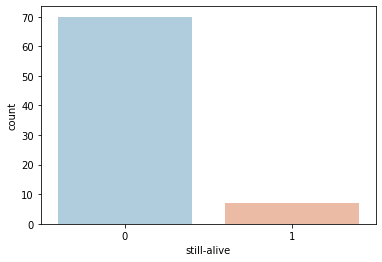

In [27]:
sns.countplot(x='still-alive',data=df1,palette='RdBu_r')

In [28]:
df1['still-alive'].value_counts()

0    70
1     7
Name: still-alive, dtype: int64

In [29]:
df1.isnull().sum()

survival                 0
still-alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-score        0
wall-motion-index        0
mult                     0
dtype: int64

In [31]:
# Test local Outlier Factor

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers_rows = lof.fit_predict(df1)

In [32]:
mask = outliers_rows != -1

In [35]:
len(mask)

77

#### Looks like there are no more anomalies in the dataset

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [50]:
from sklearn.preprocessing import StandardScaler

data1 = pd.get_dummies(df1, columns = discrete, drop_first = True)
scaler = StandardScaler()
data1[continuous] = scaler.fit_transform(data1[continuous])

In [51]:
data1.head(10)

,survival,still-alive,age-at-heart-attack,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,pericardial-effusion_1
0,-1.490486,0,1.080585,0.233467,-0.362247,-0.084470,0.128162,-0.753098,0.953213,0
1,-0.849551,0,1.198942,1.310448,-0.873142,-0.723867,0.128162,1.219685,-0.991839,0
2,-1.089902,0,-0.813129,0.233467,-1.213739,-1.593446,0.128162,-0.753098,0.953213,0
3,2.194891,0,-0.221343,0.170643,0.159206,-0.080634,0.652244,0.515120,-0.047639,0
4,-0.849551,1,-0.576414,-0.664017,1.851631,1.386141,1.176327,2.769730,-1.072096,0
5,-0.288733,0,0.725514,0.233467,-1.043440,-0.455320,-0.395920,-0.753098,0.278110,0
6,-1.330253,0,0.015371,-0.035778,3.384316,0.976928,2.355513,1.712881,0.278110,0
7,1.634072,0,-0.221343,0.861706,-0.532545,0.746745,0.128162,-0.753098,0.953213,0
8,-0.849551,0,-1.878342,0.951454,-1.894932,0.542138,0.652244,-0.358542,0.967376,0
9,-0.368850,0,-0.931486,-0.843514,0.318946,-0.225138,0.521224,-0.217628,0.622743,0


In [52]:
X = data1.drop(['still-alive'], axis=1)
y = data1['still-alive']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((53, 9), (24, 9))

In [60]:
y_train.shape, y_test.shape

((53,), (24,))

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn import datasets, metrics, model_selection, svm

In [54]:
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy_score(y_test, y_pred1)*100

0.875


87.5

Confusion Matrix 
 [[21  2]
 [ 1  0]]

f1_score 
 0.0

average_precision_score 
 0.041666666666666664

recall_score 
 0.0

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.00      0.00      0.00         1

    accuracy                           0.88        24
   macro avg       0.48      0.46      0.47        24
weighted avg       0.91      0.88      0.89        24



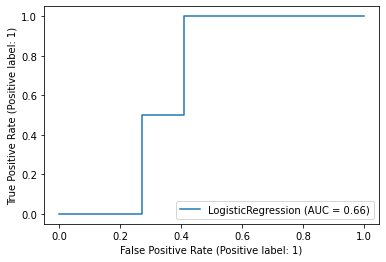

In [59]:
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred1))
print()
print('f1_score \n', f1_score(y_test,y_pred1))
print()
print('average_precision_score \n', average_precision_score(y_test,y_pred1))
print()
print('recall_score \n', recall_score(y_test,y_pred1))
print()
print('Classification Report \n',classification_report(y_test,y_pred1))
metrics.plot_roc_curve(model1, X_test, y_test)  
plt.show()

In [55]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy_score(y_test, y_pred2)*100

0.875


87.5

Confusion Matrix 
 [[21  2]
 [ 1  0]]

f1_score 
 0.0

average_precision_score 
 0.041666666666666664

recall_score 
 0.0

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.00      0.00      0.00         1

    accuracy                           0.88        24
   macro avg       0.48      0.46      0.47        24
weighted avg       0.91      0.88      0.89        24



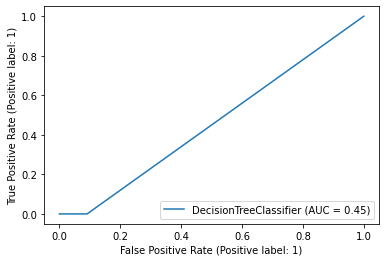

In [62]:
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred2))
print()
print('f1_score \n', f1_score(y_test,y_pred2))
print()
print('average_precision_score \n', average_precision_score(y_test,y_pred2))
print()
print('recall_score \n', recall_score(y_pred2,y_test))
print()
print('Classification Report \n',classification_report(y_test,y_pred2))
metrics.plot_roc_curve(model2, X_test, y_test)  
plt.show()

In [63]:
model3 = RandomForestClassifier(max_depth=6)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy_score(y_test, y_pred3)*100

0.9166666666666666


91.66666666666666

Confusion Matrix 
 [[22  2]
 [ 0  0]]

f1_score 
 0.0

average_precision_score 
 nan

recall_score 
 0.0

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.00      0.00      0.00         0

    accuracy                           0.92        24
   macro avg       0.50      0.46      0.48        24
weighted avg       1.00      0.92      0.96        24



C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavio

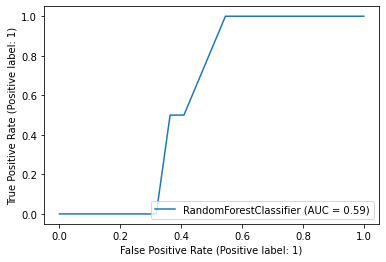

In [64]:
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred3))
print()
print('f1_score \n', f1_score(y_test,y_pred3))
print()
print('average_precision_score \n', average_precision_score(y_test,y_pred3))
print()
print('recall_score \n', recall_score(y_test,y_pred3))
print()
print('Classification Report \n',classification_report(y_test,y_pred3))
metrics.plot_roc_curve(model3, X_test, y_test)  
plt.show()

In [65]:
model4 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy_score(y_test, y_pred4)*100

0.8333333333333334


83.33333333333334

Confusion Matrix 
 [[20  2]
 [ 2  0]]

f1_score 
 0.0

average_precision_score 
 0.08333333333333333

recall_score 
 0.0

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.00      0.00      0.00         2

    accuracy                           0.83        24
   macro avg       0.45      0.45      0.45        24
weighted avg       0.83      0.83      0.83        24



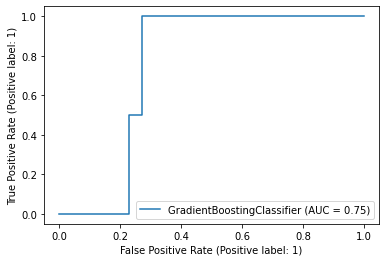

In [66]:
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred4))
print()
print('f1_score \n', f1_score(y_test,y_pred4))
print()
print('average_precision_score \n', average_precision_score(y_test,y_pred4))
print()
print('recall_score \n', recall_score(y_test,y_pred4))
print()
print('Classification Report \n',classification_report(y_test,y_pred4))
metrics.plot_roc_curve(model4, X_test, y_test)  
plt.show()